In [1]:
from qiskit import QuantumRegister, QuantumCircuit
import matplotlib

In [11]:
from qiskit_ibm_provider import IBMProvider
# IBMProvider.save_account('a4216d8e3d0791f1496a69dd9edcf472a0e7ed7c8ca57fe15b33a9af5fdd1c970bb4d8feff0e2986d4810a3c34fba9ffeda9c07ecdde6e8339a8ad4beaa27ab2')
provider = IBMProvider()
provider.active_account()
# IBMProvider.delete_account()

{'channel': 'ibm_quantum',
 'token': 'a4216d8e3d0791f1496a69dd9edcf472a0e7ed7c8ca57fe15b33a9af5fdd1c970bb4d8feff0e2986d4810a3c34fba9ffeda9c07ecdde6e8339a8ad4beaa27ab2',
 'url': 'https://auth.quantum-computing.ibm.com/api',
 'verify': True,
 'instance': 'ibm-q/open/main'}

D:\Programs\Anaconda3\envs\qiskitenv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


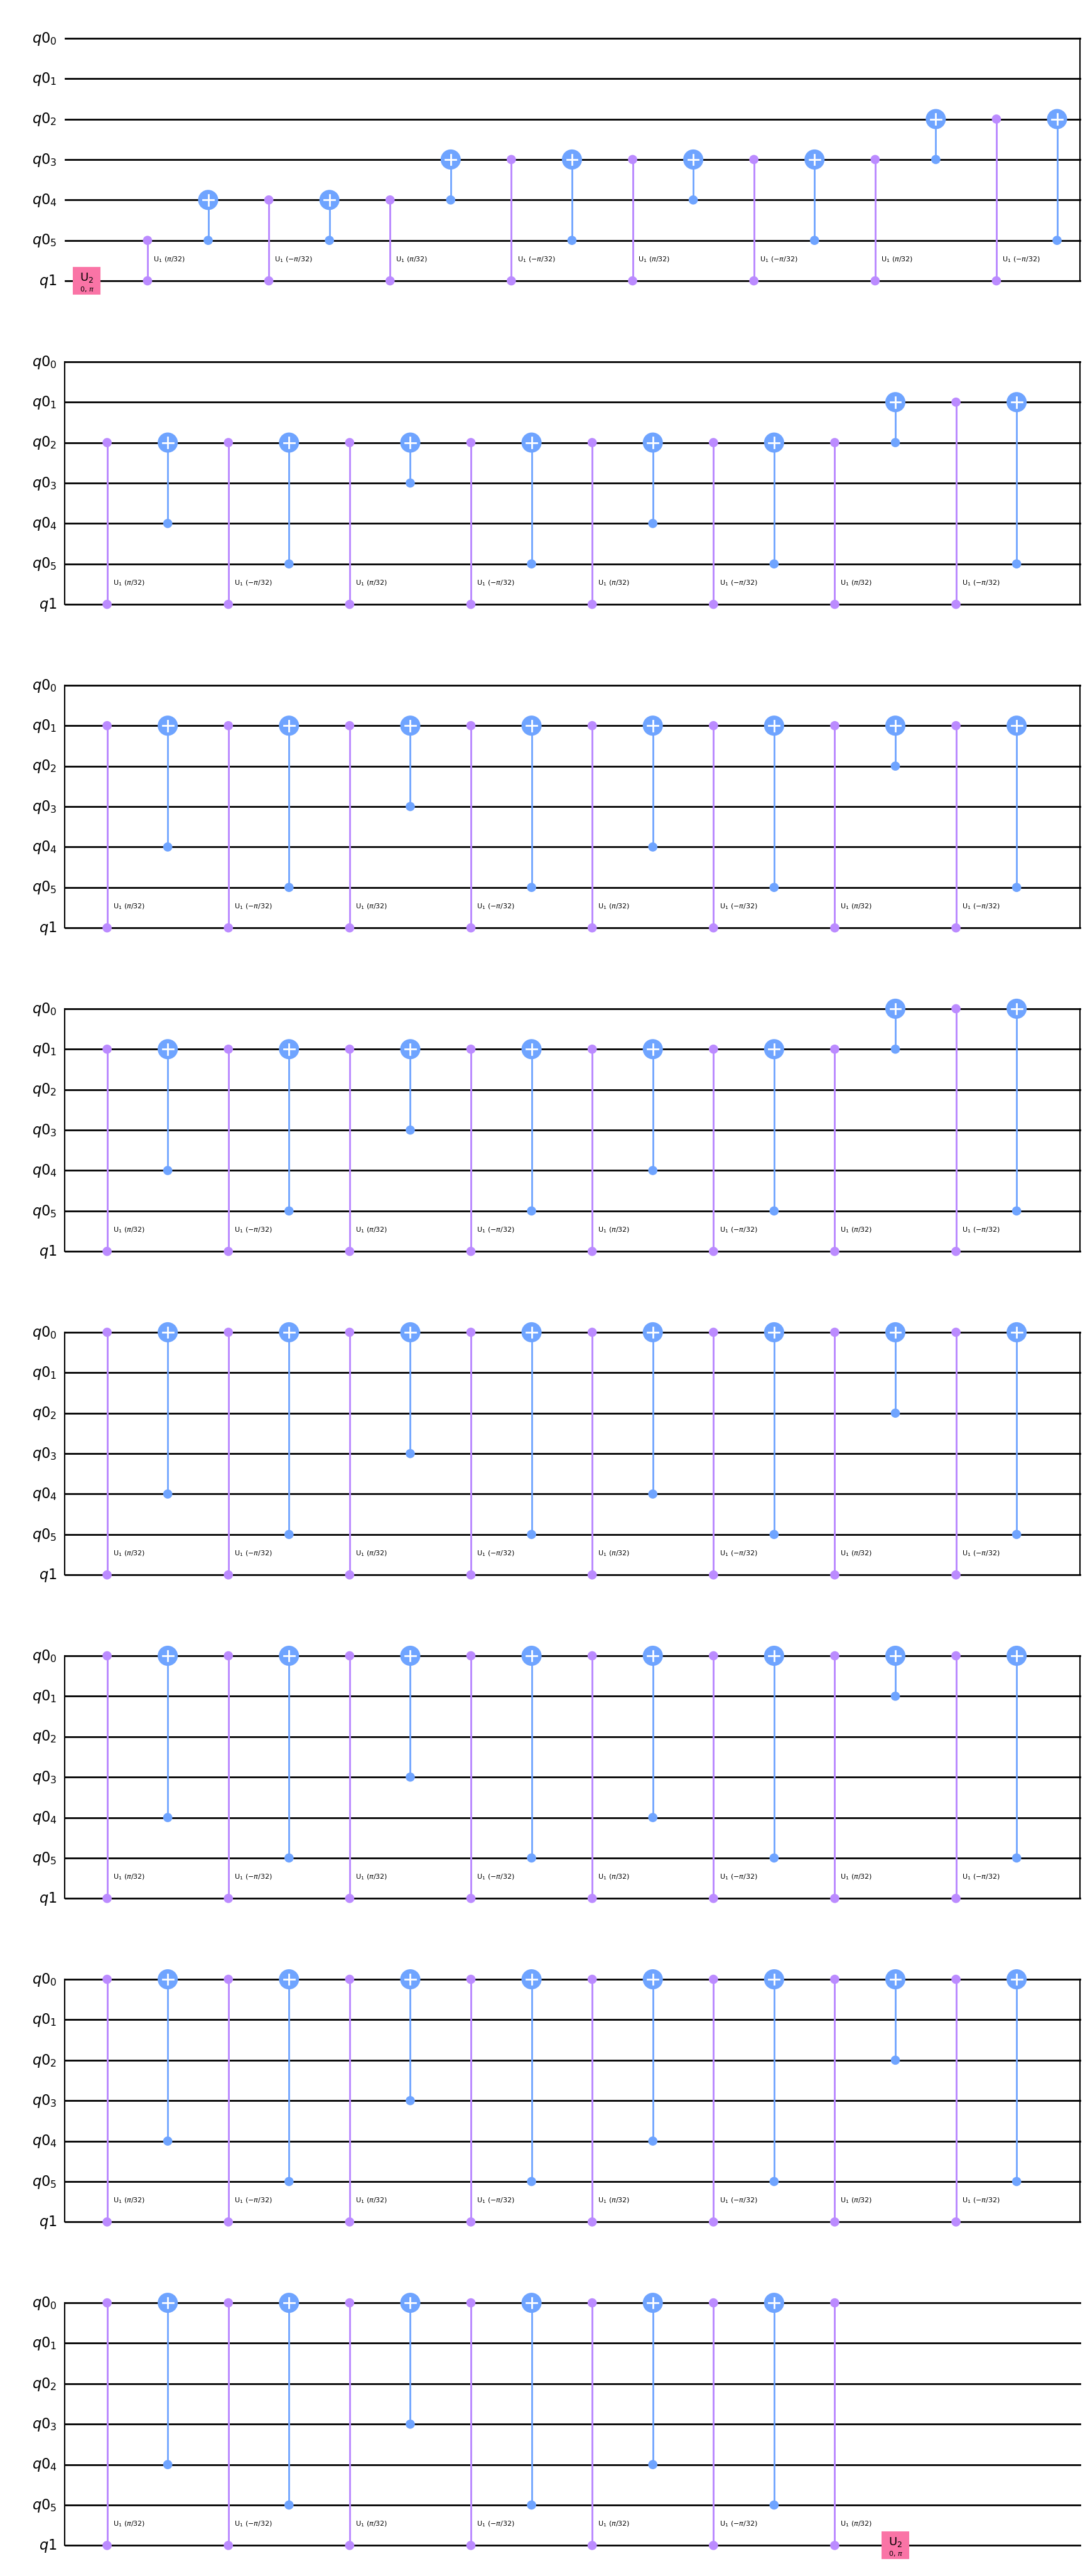

In [2]:
control = QuantumRegister(6)
target = QuantumRegister(1)
qc = QuantumCircuit(control, target)
qc.mcx(control, target[0])
qc.decompose().decompose().draw('mpl')

C:\ProgramData\anaconda3\envs\qiskitenv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


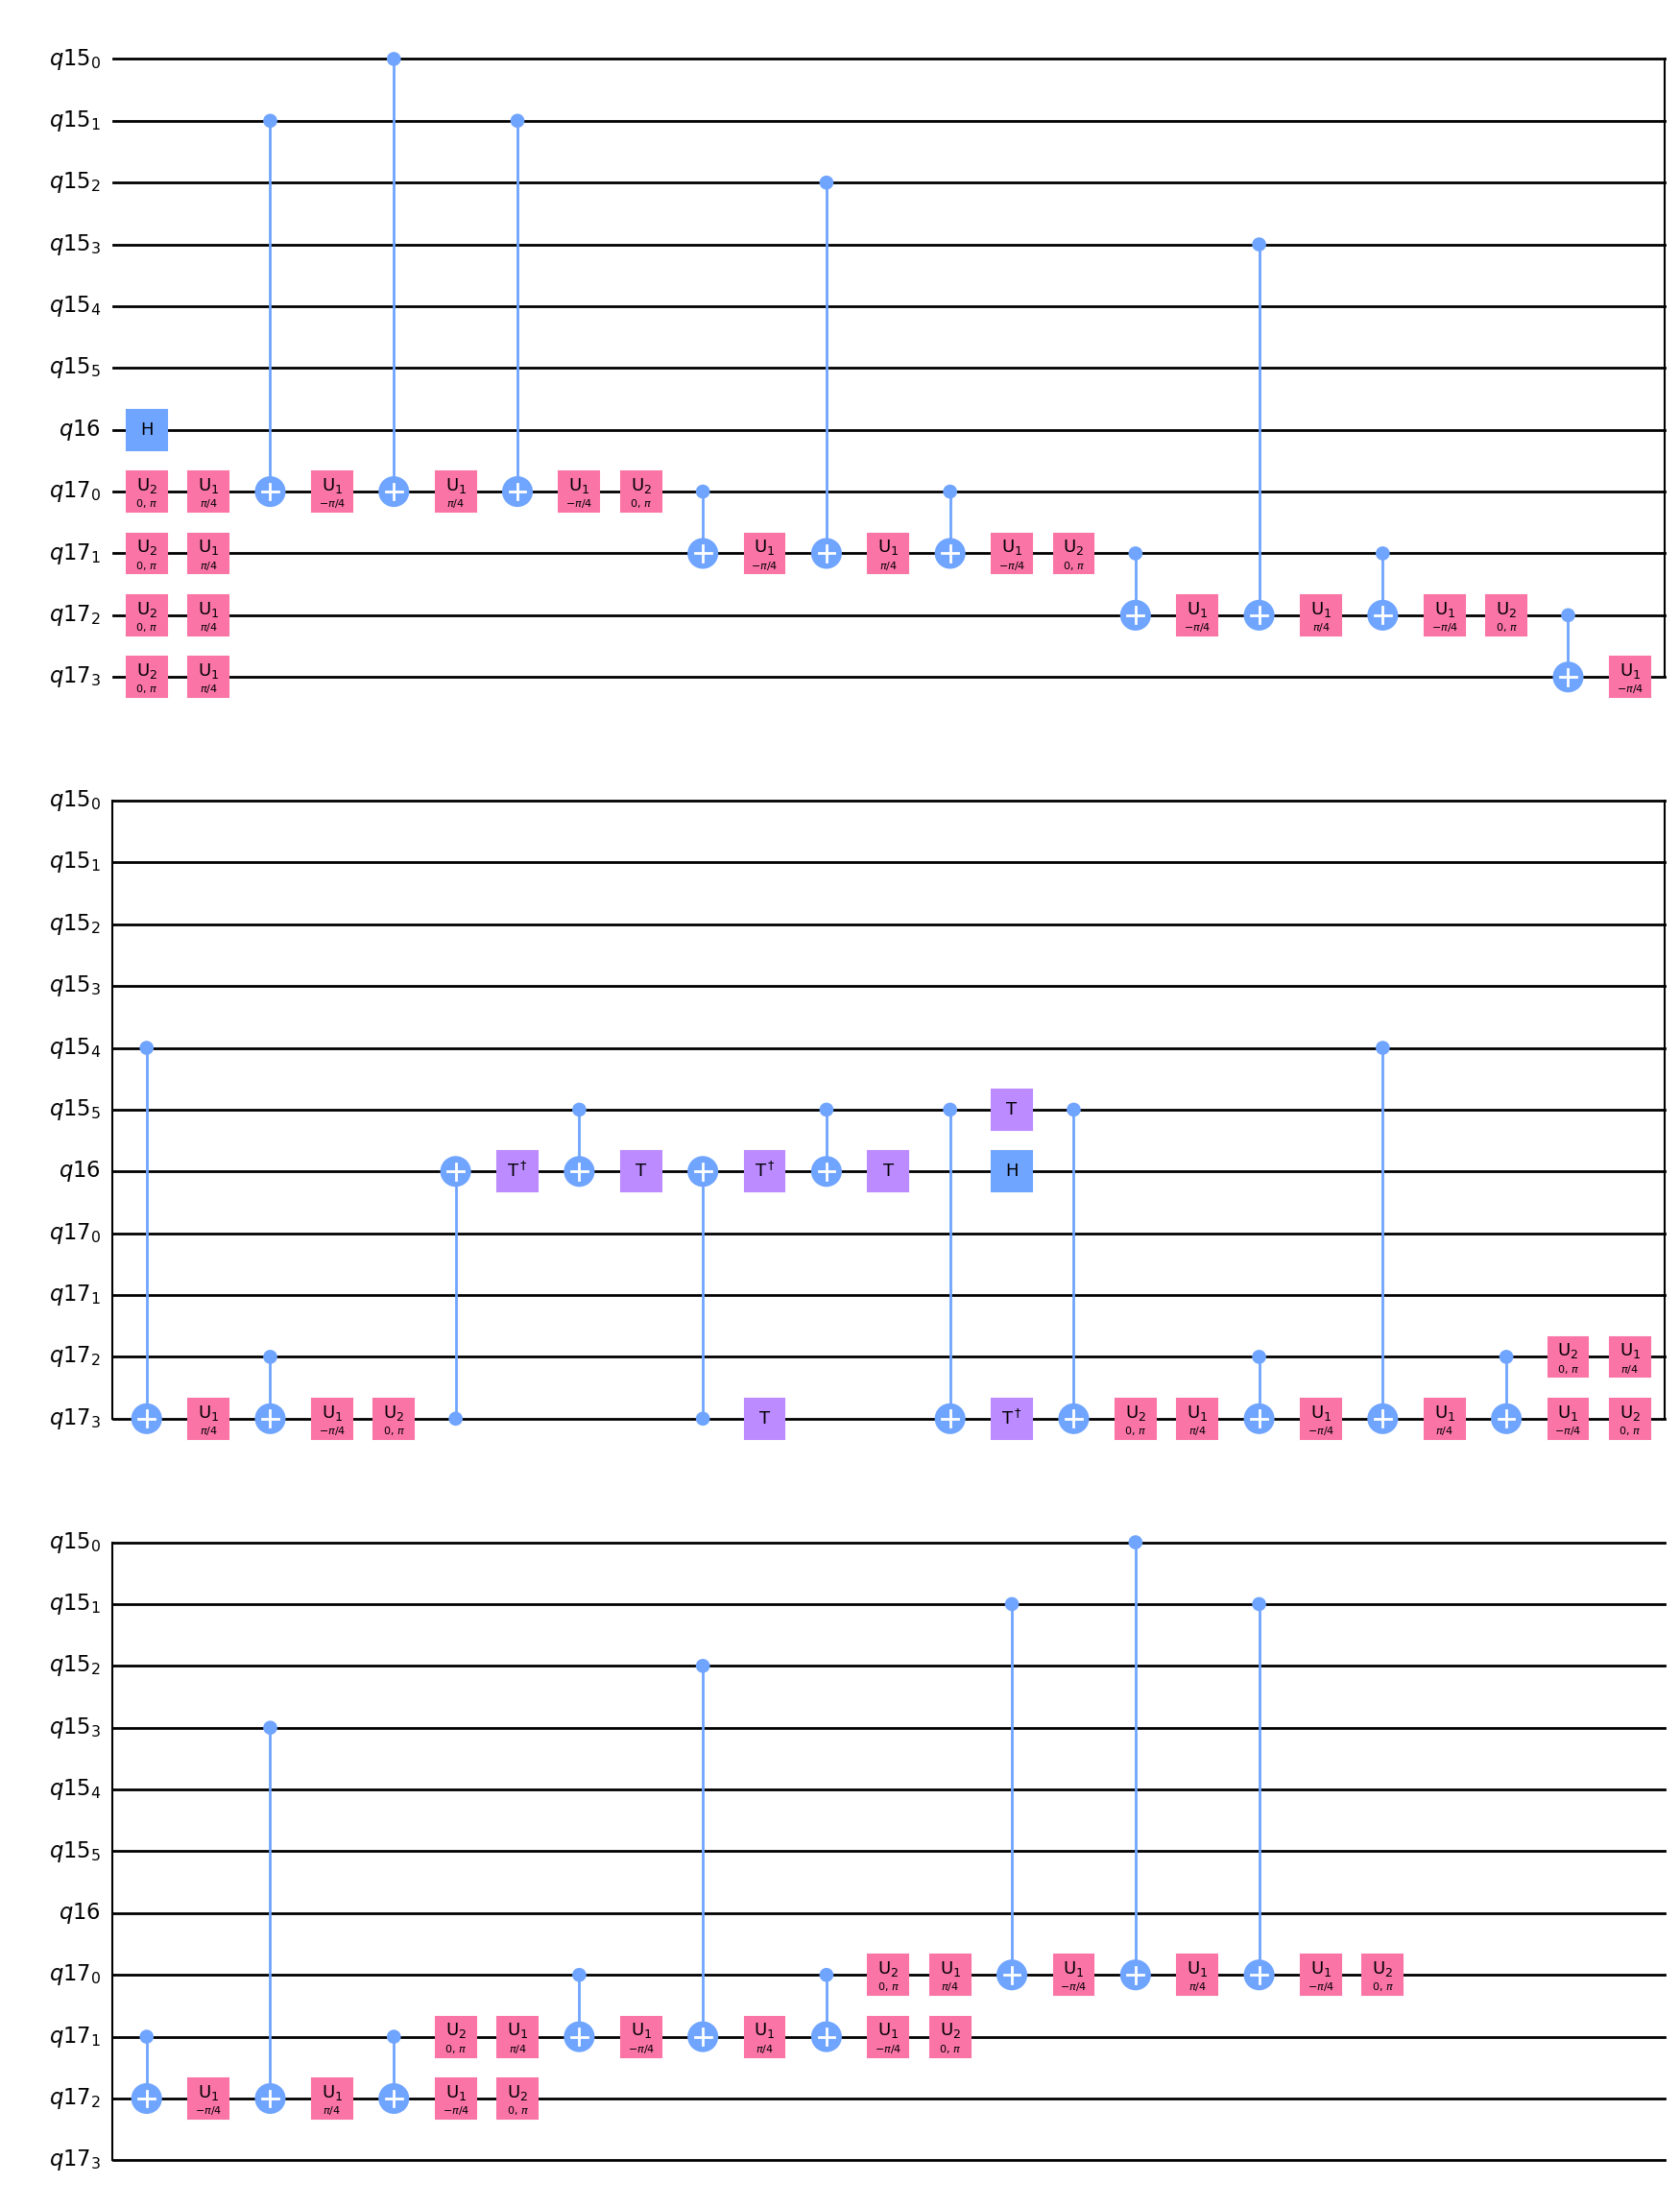

In [8]:
control = QuantumRegister(6)
target = QuantumRegister(1)
anc = QuantumRegister(4)
qc = QuantumCircuit(control, target, anc)
qc.mcx(control, target[0], anc, mode='v-chain')
qc.decompose().decompose().draw('mpl')

C:\ProgramData\anaconda3\envs\qiskitenv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


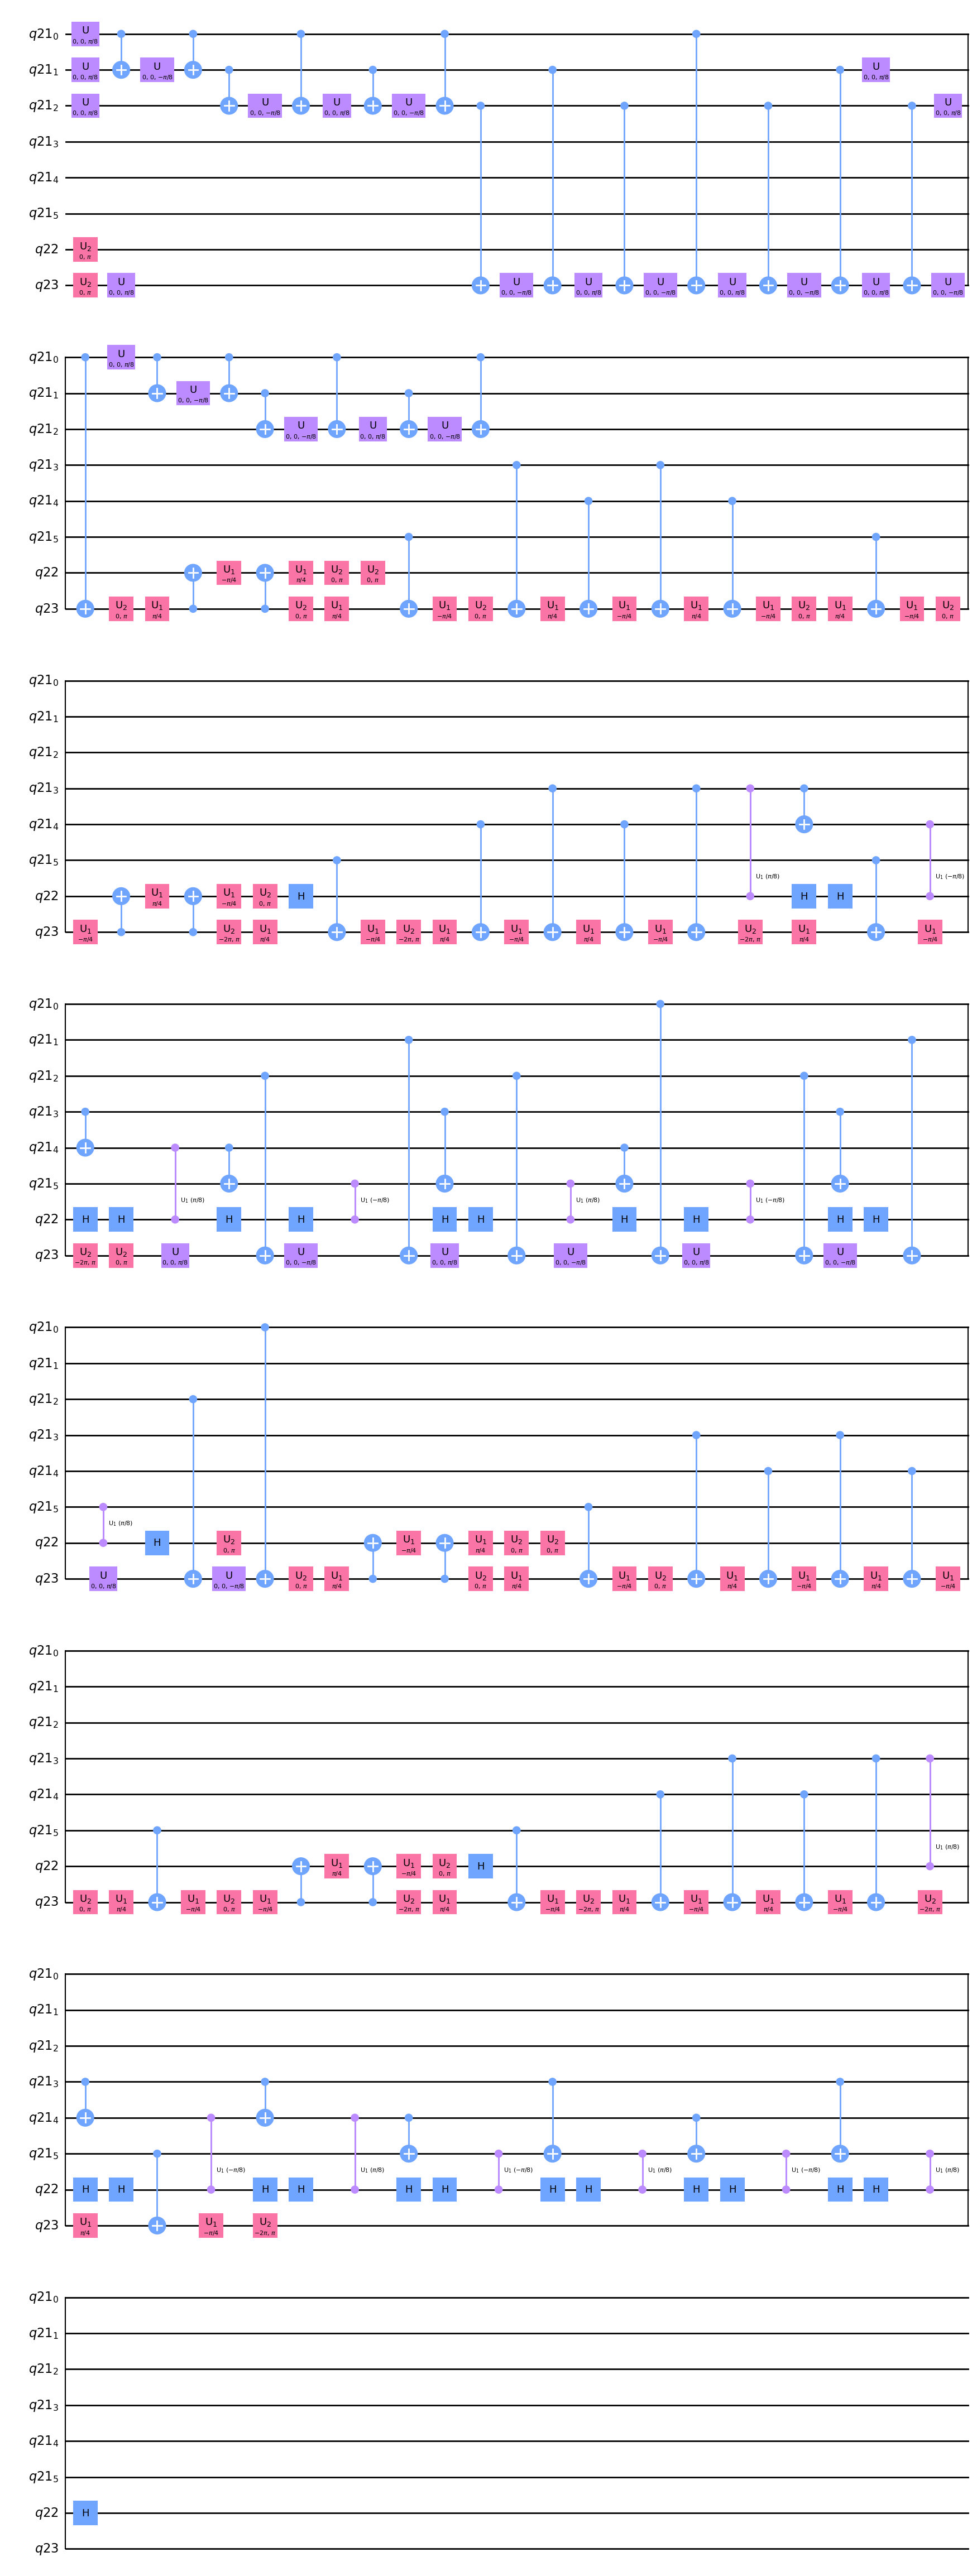

In [10]:
control = QuantumRegister(6)
target = QuantumRegister(1)
anc = QuantumRegister(1)
qc = QuantumCircuit(control, target, anc)
qc.mcx(control, target[0], anc, mode='recursion')
qc.decompose().decompose().decompose().draw('mpl')

In [9]:
import numpy as np
import qiskit.circuit.library as lib
import cmath as cm
def QPE_U(control_num, target_num, dis_adj):
    matrix = np.eye(2 ** (target_num + 1), dtype=complex)
    for i in np.arange(len(dis_adj)):
        matrix[i + 2 ** target_num][i + 2 ** target_num] = cm.exp(1j * dis_adj[i])
    print(matrix)
    u_gate = lib.UnitaryGate(matrix)

    control = QuantumRegister(control_num)
    target = QuantumRegister(target_num)
    qc = QuantumCircuit(control, target)

    for i in np.arange(control_num):
        for _ in np.arange(2 ** (control_num - i - 1)):
            qc.append(u_gate, [control[i], *target])

    return qc

dis_adj = [0.1, 0.2, 0.3, 0.4, 0.5]
QPE_U(6, 3, dis_adj)

[[1.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         1.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         1.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0.        +0.j         0.        +0.j         0.        +0.j
  0